<a href="https://colab.research.google.com/github/Kurt9806/Seismic-analysis/blob/Numerical-Methods/Response_Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Espectro de Respuesta del Sismo de Pisco 2007

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Acelerograma.csv')

In [ ]:
print(df)

            T      EW      NS      UD
0        0.00 -0.2015 -0.7075  1.3257
1        0.01  0.1538  0.3101 -0.6201
2        0.02 -0.4800  0.6862 -2.0637
3        0.03 -0.6667  0.2348  0.2742
4        0.04  0.3037 -0.1436  3.5169
...       ...     ...     ...     ...
21802  218.02 -0.3421 -0.1255  0.0157
21803  218.03 -0.3353  0.1272 -0.0973
21804  218.04 -0.6170 -0.2533 -0.2309
21805  218.05 -0.6190 -0.4306 -0.1228
21806  218.06 -0.4554 -0.1593 -0.0147

[21807 rows x 4 columns]


In [ ]:
# Extract data
t = df['T']
EW = df['EW']

In [ ]:
# Define the function
def Central_Method(xi,wn,E,k,dt,m,T):
  a = xi*wn
  wd = wn*math.sqrt(1-xi**2)

  A = math.e**(-a*dt)*(xi/(math.sqrt(1-xi**2))*math.sin(wd*dt)+math.cos(wd*dt))
  B = math.e**(-a*dt)*(1/wd*math.sin(wd*dt))
  C = 1/k*(2*xi/(wn*dt)+math.e**(-a*dt)*(((1-2*xi**2)/(wd*dt)-xi/math.sqrt(1-xi**2))*math.sin(wd*dt)-(1+2*xi/(wn*dt))*math.cos(wd*dt)))
  D = 1/k*(1-2*xi/(wn*dt)+math.e**(-a*dt)*((2*xi**2-1)/(wd*dt)*math.sin(wd*dt)+2*xi/(wn*dt)*math.cos(wd*dt)))
  A_ = -math.e**(-a*dt)*(wn/math.sqrt(1-xi**2)*math.sin(wd*dt))
  B_ = math.e**(-a*dt)*(math.cos(wd*dt)-xi/math.sqrt(1-xi**2)*math.sin(wd*dt))
  C_ = 1/k*(-1/dt+math.e**(-a*dt)*((wn/math.sqrt(1-xi**2)+xi/(dt*math.sqrt(1-xi**2)))*math.sin(wd*dt)+1/dt*math.cos(wd*dt)))
  D_ = 1/(k*dt)*(1-math.e**(-a*dt)*(xi/math.sqrt(1-xi**2)*math.sin(wd*dt)+math.cos(wd*dt)))

  u = np.zeros(len(T))
  u_ = np.zeros(len(T))

  for i in range(len(T)-1):
    u[i+1] = A*u[i] + B*u_[i] + C*(-m*9.81*E[i]) + D*(-m*9.81*E[i+1])
    u_[i+1] = A_*u[i] + B_*u_[i] + C_*(-m*9.81*E[i]) + D_*(-m*9.81*E[i+1])
  
  return u, u_

In [ ]:
# Input Data
xi=0.02
m=1
dt=t[1]-t[0]
T = np.transpose(np.arange(0.01,3,dt))
omega_n = 2*math.pi/T
K = m*omega_n*omega_n

print(len(T))

# Solve the problem
D = np.zeros(len(T))
for j in range(len(T)):
  wn = omega_n[j]
  k = K[j]
  [u, v] = Central_Method(xi,wn,E,k,dt,m,T)
  D[j]=max(abs(u))

# Calculate the pseudo velocity and psuedo aceleration
V = omega_n*D
A = omega_n*omega_n*D

299


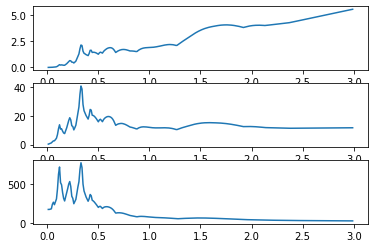

In [ ]:
# plot figures
plt.title('Response Espectrum of 2007 Pisco Earthquake')
plt.subplot(3,1,1)
plt.plot(T,D)
plt.subplot(3,1,2)
plt.plot(T,V)
plt.subplot(3,1,3)
plt.plot(T,A)